# Gaussian Fit of the data

## The mathematical representation of the one dimensional Gaussian 
$y = I_0*\exp^{ - \left(\frac{x-x_0}{2\sigma_x}\right)^2} + z_0$


## The mathematical representation of the two dimensional Gaussian 

$a = \frac{\cos^2(\theta)}{2\sigma_x^2} + \frac{\sin^2(\theta)}{2\sigma_y^2}$

$b = -\frac{\sin(2\theta)}{4\sigma_x^2} + \frac{\sin(2\theta)}{4\sigma_y^2}$

$c = \frac{\sin^2(\theta)}{2\sigma_x^2} + \frac{\cos^2(\theta)}{2\sigma_y^2}$

$z = I_0*e^{ - \left(a*(x-x_0)^2 + 2*b*(x-x_0)*(y-y_0) + c*(y-y_0)^2\right)} + z_0$


First we should import all necessery libraries

In [1]:
import ubcs_auxiliary                                                                    
import lmfit                                                                             
import numpy as np 
from matplotlib import pyplot as plt



Let us define functions that will create a 1D Gaussian

In [2]:
def gaussian1D(x, amp, x0, sigma, offset):
    """
    simple one-dimensional gaussian function
    """
    from numpy import exp
    y = amp*exp(-(x-x0)**2/(2*sigma*sigma))
    return y

def fit_gaussian1D(x,y, p0 = {'amp':10,'x0':0,'sigma':1,'offset': 0}):
    """

    """
    from lmfit import Parameters, minimize

    eps_data = y*0+1
    from time import time, ctime

    def residual(params,x,y,eps_data):
        amp = params['amp']
        x0 = params['x0']
        sigma = params['sigma']
        offset = params['offset']
        modely = gaussian1D(x,amp,x0,sigma,offset)
        return (y-modely)

    params = Parameters()

    params.add('amp', value=p0['amp'], min=0)
    params.add('x0', value=p0['x0'])
    params.add('sigma', value=p0['sigma'], min=0.1, max = 15)
    params.add('offset', value=p0['offset'], vary = False)

    out = minimize(residual, params, args=(x, y, eps_data))
    amp = out.params['amp'].value
    x0 = out.params['x0'].value
    sigma = out.params['sigma'].value
    offset = out.params['offset'].value


    y_fit = gaussian1D(x,amp,x0,sigma,offset)
    return y_fit, out
    


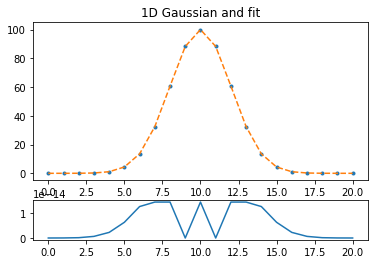

In [3]:
x = np.linspace(0,20,21)
y = gaussian1D(x,100,10,2,0)
p0 = {'amp':10,'x0':0,'sigma':1,'offset': 0}

y_fit,out = fit_gaussian1D(x,y,p0=p0)

fig = plt.figure()#figsize=(6,6))
grid = plt.GridSpec(4, 1, hspace=0.5, wspace=0.25)

#colors = cm.rainbow(np.linspace(0, 1, len(ys)))
ax1 = fig.add_subplot(grid[0:3,0])#, projection='3d')
ax1.plot(x,y,'o', markersize = 3)
ax1.plot(x,y_fit,'--', markersize = 3)
ax1.set_title('1D Gaussian and fit')

ax2 = fig.add_subplot(grid[3,0])#, projection='3d')
ax2.plot((y_fit-y))
#ax2.set_title('Data - fit')



The curves above do not have any noise in them. The real data does have noise. 

In [4]:
def noise(arr,mean,sigma):
    """
    returns normal distributed noise array
    of shape x with mean and sigma.
    """
    from numpy.random import normal
    result = normal(mean,sigma,arr.shape)
    return result


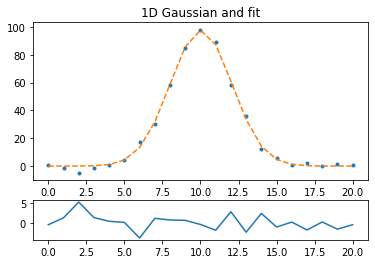

In [5]:

x = np.linspace(0,20,21)
y = gaussian1D(x,100,10,2,0) + noise(x,0,2)


p0 = {'amp':10,'x0':0,'sigma':1,'offset': 0}

y_fit,out = fit_gaussian1D(x,y,p0=p0)

fig = plt.figure()#figsize=(6,6))
grid = plt.GridSpec(4, 1, hspace=0.5, wspace=0.25)

#colors = cm.rainbow(np.linspace(0, 1, len(ys)))
ax1 = fig.add_subplot(grid[0:3,0])#, projection='3d')
ax1.plot(x,y,'o', markersize = 3)
ax1.plot(x,y_fit,'--', markersize = 3)
ax1.set_title('1D Gaussian and fit')

ax2 = fig.add_subplot(grid[3,0])#, projection='3d')
ax2.plot((y_fit-y))
#ax2.set_title('Data - fit')

Note that initial parameters are very important for the good quality fit. The one above doesn't fit the data because the p0 (initial parameters) are too far from the refined result. Hence, the non-linear fit cannot find global minimum

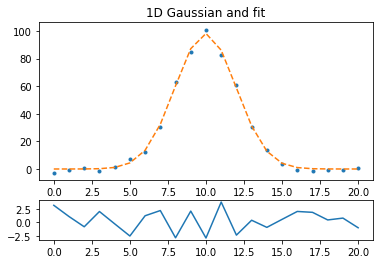

In [6]:

x = np.linspace(0,20,21)
y = gaussian1D(x,100,10,2,0) + noise(x,0,2)


p0 = {'amp':10,'x0':10,'sigma':1,'offset': 0}

y_fit,out = fit_gaussian1D(x,y,p0=p0)

fig = plt.figure()#figsize=(6,6))
grid = plt.GridSpec(4, 1, hspace=0.5, wspace=0.25)

#colors = cm.rainbow(np.linspace(0, 1, len(ys)))
ax1 = fig.add_subplot(grid[0:3,0])#, projection='3d')
ax1.plot(x,y,'o', markersize = 3)
ax1.plot(x,y_fit,'--', markersize = 3)
ax1.set_title('1D Gaussian and fit')

ax2 = fig.add_subplot(grid[3,0])#, projection='3d')
ax2.plot((y_fit-y))
#ax2.set_title('Data - fit')

Let us define functions that will create a 2D Gaussian

First we should import all necessery libraries

In [7]:
def gaussian2D_from_mesh(mesh, amplitude, x0, y0, x_sigma, y_sigma, offset = 0 , theta = 0):
    """
    returns two-dimensional gaussian

    .. math::

        a = \frac{\cos(\\theta)^2}{2\sigma_x^2} + \frac{\sin(\\theta)^2}{2\sigma_y^2}

        b = -(\sin(2\\theta))/(4\sigma_x^2) + (\sin(2\\theta))/(4\sigma_y^2)

        c = (\sin(\\theta)^2)/(2\sigma_x^2) + (\cos(\\theta)^2)/(2\sigma_y^2)

        z = Amplitude*\exp^{( - (a*((x-x0)^2) + 2*b*(x-x0)*(y-y0) + c*((y-y0)^2)))} + offset


    Parameters
    ----------
    mesh (2d numpy array)
    amplitude (float)
    x0 (float)
    y0 (float)
    x_sigma (float)
    y_sigma  (float)
    offset (float)
    theta (float)

    Returns
    -------
    z (2d numpy array)

    Examples
    --------
    >>> x = np.linspace(0, 20, 21)
    >>> y = np.linspace(0, 20, 21)
    >>> x,y = np.meshgrid(x, y)
    >>> xy = (x,y)
    >>> amp, x0, y0, sigmax, sigmay,offset, theta = 100,10,10,3,3,0,0
    >>> z = gaussian2D_from_mesh(xy,amp,x0,y0,sigmax,sigmay,offset)
    """
    from numpy import cos, sin, exp
    x = mesh[0]
    y = mesh[1]
    a = (cos(theta)**2)/(2*x_sigma**2) + (sin(theta)**2)/(2*y_sigma**2)
    b = -(sin(2*theta))/(4*x_sigma**2) + (sin(2*theta))/(4*y_sigma**2)
    c = (sin(theta)**2)/(2*x_sigma**2) + (cos(theta)**2)/(2*y_sigma**2)
    z = offset + amplitude*exp( - (a*((x-x0)**2) + 2*b*(x-x0)*(y-y0) + c*((y-y0)**2)))
    return z


def fit_2d_gauss(image):
    """

    """
    from lmfit import Parameters, minimize
    img = image
    img_fit = img*0
    eps_data = image*0+1
    x = np.linspace(0, 20, 21)
    y = np.linspace(0, 20, 21)
    x,y = np.meshgrid(x, y)
    xy = (x,y)
    data = img
    from time import time, ctime

    
    def residual(params,xy,data,eps_data):
        amp = params['amp']
        x0 = params['x0']
        y0 = params['y0']
        sigmax = params['sigmax']
        sigmay = params['sigmay']
        offset = params['offset']
        #print(ctime(time()))
        modelx, modely, modelz = x,y,gaussian2D_from_mesh(xy,amp,x0,y0,sigmax,sigmay,offset)
        return (data-modelz)

    params = Parameters()

    params.add('amp', value=img[10,10], min=0)
    params.add('x0', value=10)
    params.add('y0', value=10)
    params.add('sigmax', value=1, min=0.1, max = 15, vary = True)
    params.add('sigmay', value=1, min=0.1, max = 15, vary = True)
    params.add('offset', value=0, vary = True)

    out = minimize(residual, params, args=(xy, data, eps_data))
    amp = out.params['amp'].value
    x0 = out.params['x0'].value
    y0 = out.params['y0'].value
    sigmax = out.params['sigmax'].value
    sigmay = out.params['sigmay'].value
    offset = out.params['offset'].value



    img_fit_x,img_fit_y,img_fit = x,y,gaussian2D_from_mesh(xy,amp,x0,y0,sigmax,sigmay,offset,0)
    return img, img_fit, out

In [29]:
x = np.linspace(0, 20, 21)   
y = np.linspace(0, 20, 21)   
x,y = np.meshgrid(x, y)
xy = (x,y)

n = noise(x, 2, 0)
amp = 500
x0 = 10.0
y0 = 10.0
sigmax = .1
sigmay = 0.1

offset = 0
theta = 0
z = gaussian2D_from_mesh(xy,amp,x0,y0,sigmax,sigmay,offset, theta) + noise(x, 0, 0.7)
_, z_fit, out = fit_2d_gauss(z)

name,value,standard error,relative error,initial value,min,max,vary
amp,510.085454,841397.212,(164952.21%),499.8672945978371,0.00000000,inf,True
x0,10.0330446,1422.11816,(14174.34%),10,-inf,inf,True
y0,9.98364741,0.04521831,(0.45%),10,-inf,inf,True
sigmax,0.17167167,261.111027,(152099.08%),1,0.10000000,15.0000000,True
sigmay,0.28160714,0.01291998,(4.59%),1,0.10000000,15.0000000,True
offset,-0.01079910,0.03426465,(317.29%),0,-inf,inf,True


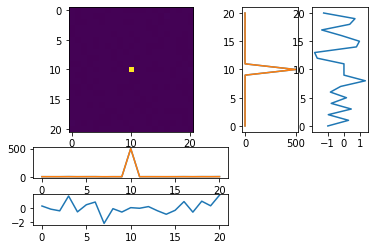

In [30]:
fig = plt.figure()#figsize=(6,6))
grid = plt.GridSpec(5, 5, hspace=0.5, wspace=0.25)

#colors = cm.rainbow(np.linspace(0, 1, len(ys)))
ax1 = fig.add_subplot(grid[:3,:3])#, projection='3d')
ax1.imshow(z)

#ax1.set_title('1D Gaussian and fit')

ax2 = fig.add_subplot(grid[3,:3])#, projection='3d')
ax2.plot(z[10,:])
ax2.plot(z_fit[10,:])

ax4 = fig.add_subplot(grid[4,:3])#, projection='3d')
ax4.plot(z[10,:]-z_fit[10,:])

ax3 = fig.add_subplot(grid[:3,3])#, projection='3d')
ax3.plot(z[:,10],x[0])
ax3.plot(z_fit[:,10],x[0])

ax5 = fig.add_subplot(grid[:3,4])#, projection='3d')
ax5.plot(z[:,10]-z_fit[:,10],x[0])
out.params


The fit does poor job fitting Gaussian image that is too pixelated and if the peak is not centered on the 

In [38]:
def pixelate_image(x,y,z,pixel_size = 10, saturation_value = None):
    """
    returns pixilated image with pixel_size as input.
    The shape has to be divisible by pixel_size

    .. math::

        z =

    Parameters
    ----------
    mesh (2d numpy array)
    amplitude (float)
    x0 (float)
    y0 (float)
    x_sigma (float)
    y_sigma  (float)
    offset (float)
    theta (float)

    Returns
    -------
    z (2d numpy array)

    Examples
    --------
    >>> x = np.linspace(0, 20, 21)
    >>> y = np.linspace(0, 20, 21)
    >>> x,y = np.meshgrid(x, y)
    >>> xy = (x,y)
    >>> amp, x0, y0, sigmax, sigmay,offset, theta = 100,10,10,3,3,0,0
    >>> z = gaussian2D_from_mesh(xy,amp,x0,y0,sigmax,sigmay,offset)
    """
    from numpy import zeros
    x_shape = x.shape[0]
    y_shape = y.shape[0]
    z_shape = z.shape[0]
    x_new_len = int(x_shape/pixel_size)
    y_new_len = int(y_shape/pixel_size)
    z_new_len = int(z_shape/pixel_size)
    x_new = zeros((x_new_len,x_new_len))
    y_new = zeros((y_new_len,y_new_len))
    z_new = zeros((z_new_len,z_new_len))
    for i in range(int(x_new_len)):
        for j in range(int(x_new_len)):
            y_new[i,j] = y[i*pixel_size:(i+1)*pixel_size,j*pixel_size:(j+1)*pixel_size].mean()
            x_new[i,j] = x[i*pixel_size:(i+1)*pixel_size,j*pixel_size:(j+1)*pixel_size].mean()
            z_new[i,j] = z[i*pixel_size:(i+1)*pixel_size,j*pixel_size:(j+1)*pixel_size].mean()
    if saturation_value is not None:
        z_new[z_new>=saturation_value] = saturation_value
    return x_new,y_new,z_new


def fit_2d_gauss_pixelate(image):
    """

    """
    from lmfit import Parameters, minimize
    img = image
    img_fit = img*0
    eps_data = image*0+1
    x = np.linspace(0, 20, 210)
    y = np.linspace(0, 20, 210)
    x,y = np.meshgrid(x, y)
    xy = (x,y)
    data = img
    from time import time, ctime

    def residual(params,xy,data,eps_data):
        amp = params['amp']
        x0 = params['x0']
        y0 = params['y0']
        sigmax = params['sigmax']
        sigmay = params['sigmay']
        offset = params['offset']
        #print(ctime(time()))
        modelx, modely, modelz = pixelate_image(x,y,gaussian2D_from_mesh(xy,amp,x0,y0,sigmax,sigmay,offset,0),10)
        return (data-modelz)

    params = Parameters()

    params.add('amp', value=img[10,10], min=0)
    params.add('x0', value=10)
    params.add('y0', value=10)
    params.add('sigmax', value=1, min=0.1, max = 15)
    params.add('sigmay', value=1, min=0.1, max = 15)
    params.add('offset', value=0, vary = True)
    params.add('theta', value=0, vary = False)

    out = minimize(residual, params, args=(xy, data, eps_data))
    amp = out.params['amp'].value
    x0 = out.params['x0'].value
    y0 = out.params['y0'].value
    sigmax = out.params['sigmax'].value
    sigmay = out.params['sigmay'].value

    offset = out.params['offset'].value

    img_fit_x,img_fit_y,img_fit = pixelate_image(x,y,gaussian2D_from_mesh(xy,amp,x0,y0,sigmax,sigmay,offset,0),10)
    return img, img_fit, out



In [39]:
x = np.linspace(0, 20, 21)   
y = np.linspace(0, 20, 21)   
x,y = np.meshgrid(x, y)
xy = (x,y)

n = noise(x, 2, 0)
amp = 4096
x0 = 10.0
y0 = 10.0
sigmax = .1
sigmay = .1
offset = 0
theta = 0
z = gaussian2D_from_mesh(xy,amp,x0,y0,sigmax,sigmay,offset, theta) + noise(x, 0, 0.7)
_, z_fit, out = fit_2d_gauss_pixelate(z)

name,value,initial value,min,max,vary
amp,46204.3989,4095.931783095992,0.00000000,inf,True
x0,9.95234537,10,-inf,inf,True
y0,9.98244929,10,-inf,inf,True
sigmax,0.12784668,1,0.10000000,15.0000000,True
sigmay,0.10108560,1,0.10000000,15.0000000,True
offset,0.06759028,0,-inf,inf,True
theta,0.00000000,0,-inf,inf,False


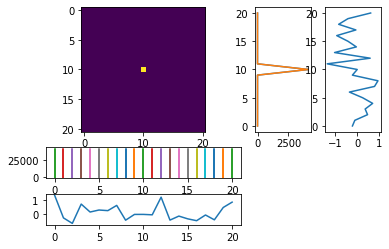

In [40]:
fig = plt.figure()#figsize=(6,6))
grid = plt.GridSpec(5, 5, hspace=0.5, wspace=0.25)

#colors = cm.rainbow(np.linspace(0, 1, len(ys)))
ax1 = fig.add_subplot(grid[:3,:3])#, projection='3d')
ax1.imshow(z)

#ax1.set_title('1D Gaussian and fit')

ax2 = fig.add_subplot(grid[3,:3])#, projection='3d')
ax2.plot(x,z[10,:])
ax2.plot(x,z_fit[10,:])

xfine = np.linspace(0, 200, 210)   
z_fit2 = gaussian2D_from_mesh(xy,out.params['amp'],out.params['x0'],out.params['y0'],out.params['sigmax'],out.params['sigmay'],out.params['offset'], out.params['theta'])
ax2.plot(xfine,z_fit2[10,:])


ax4 = fig.add_subplot(grid[4,:3])#, projection='3d')
ax4.plot(z[10,:]-z_fit[10,:])


ax3 = fig.add_subplot(grid[:3,3])#, projection='3d')
ax3.plot(z[:,10],x[0])
ax3.plot(z_fit[:,10],x[0])

ax5 = fig.add_subplot(grid[:3,4])#, projection='3d')
ax5.plot(z[:,10]-z_fit[:,10],x[0])

out.params

In [36]:

out.params

name,value,standard error,relative error,initial value,min,max,vary
amp,42466.4927,362562.534,(853.76%),4095.0873606551922,0.00000000,inf,True
x0,10.0012069,4.32095825,(43.20%),10,-inf,inf,True
y0,10.0072970,0.02215491,(0.22%),10,-inf,inf,True
sigmax,0.10164190,0.86567460,(851.69%),1,0.10000000,15.0000000,True
sigmay,0.13832896,0.00621270,(4.49%),1,0.10000000,15.0000000,True
offset,0.04591361,0.03476596,(75.72%),0,-inf,inf,True
